In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings("ignore")

Path =  pd.read_csv('Data_Unbalanced.csv', delimiter=',')
print( Path.describe().T)

X = Path.iloc[:,0:11]
y = Path.iloc[:,-1]
#Path.head()

                   count       mean       std      min       25%    50%       75%      max
CARRERA             59.0   1.474576  0.678638   1.0000   1.00000   1.00   2.00000   3.0000
SEXO                59.0   1.491525  0.504219   1.0000   1.00000   1.00   2.00000   2.0000
EDAD                59.0   1.220339  0.418033   1.0000   1.00000   1.00   1.00000   2.0000
SECUNDARIA          59.0   1.135593  0.345295   1.0000   1.00000   1.00   1.00000   2.0000
NOTA_INGRESO        59.0  38.680678  8.320279  21.3000  32.17500  38.65  42.80500  60.5500
MODALIDAD_INGRESO   59.0   1.322034  0.471267   1.0000   1.00000   1.00   2.00000   2.0000
DEPENDIENTE         59.0   1.864407  0.345295   1.0000   2.00000   2.00   2.00000   2.0000
TOTAL_INGRESOS      59.0   1.983051  0.798523   1.0000   1.00000   2.00   3.00000   3.0000
PROMEDIO            59.0  10.152453  3.565626   1.0435   8.86955  11.05  12.54345  15.6522
AMONESTACIONES      59.0   0.457627  0.502478   0.0000   0.00000   0.00   1.00000   1.0000

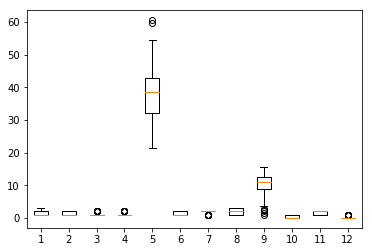

In [2]:
data = [ Path['CARRERA'], Path['SEXO'], Path['EDAD'], Path['SECUNDARIA'], Path['NOTA_INGRESO'], Path['MODALIDAD_INGRESO'], Path['DEPENDIENTE'], Path['TOTAL_INGRESOS'], Path['PROMEDIO'], Path['AMONESTACIONES'], Path['TERCIO'], Path['Class'] ]
plt.figure()
plt.boxplot(data)

plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

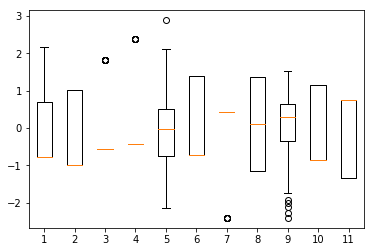

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

plt.figure()
plt.boxplot(X_train)
plt.show()

In [5]:
df = pd.read_csv('Data_Unbalanced2.csv', names=['CARRERA','SEXO','EDAD','SECUNDARIA','NOTA_INGRESO','MODALIDAD_INGRESO',
                             'DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','AMONESTACIONES','TERCIO','Class'])

features = ['SECUNDARIA','NOTA_INGRESO','DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','TERCIO']

x = df.loc[:, features].values 
y = df.loc[:,['Class']].values

x = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

In [7]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)
#print(finalDf)

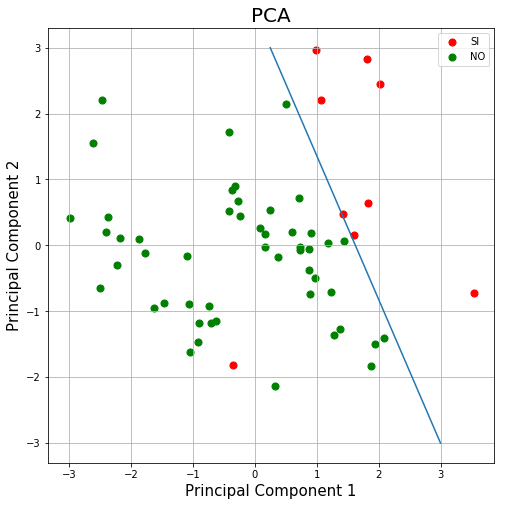

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

targets = ['SI', 'NO']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.plot([3,0.25],[-3,3])
ax.grid()

#features = ['SECUNDARIA','NOTA_INGRESO','DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','TERCIO']

In [10]:
from sklearn.preprocessing import scale
data = pd.DataFrame(scale(Path), columns=['CARRERA','SEXO','EDAD','SECUNDARIA','NOTA_INGRESO','MODALIDAD_INGRESO',
                             'DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','AMONESTACIONES','TERCIO','Class'])
data = data.drop(["Class"], axis=1)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

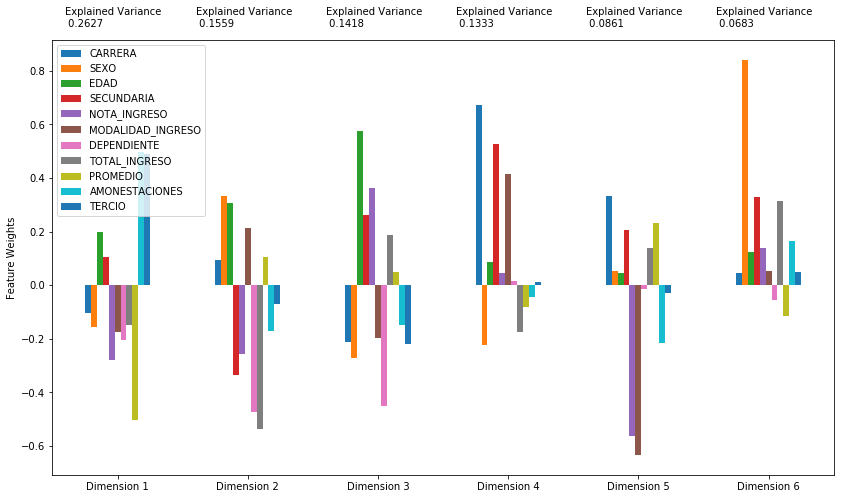

In [14]:
import numpy as np
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)


In [15]:
pca_results.cumsum()

,Explained Variance,CARRERA,SEXO,EDAD,SECUNDARIA,NOTA_INGRESO,MODALIDAD_INGRESO,DEPENDIENTE,TOTAL_INGRESO,PROMEDIO,AMONESTACIONES,TERCIO
Dimension 1,0.2627,-0.1040,-0.1582,0.1991,0.1062,-0.2794,-0.1767,-0.2058,-0.1479,-0.5045,0.4970,0.4880
Dimension 2,0.4186,-0.0091,0.1759,0.5063,-0.2299,-0.5367,0.0382,-0.6785,-0.6869,-0.3986,0.3257,0.4160
Dimension 3,0.5604,-0.2212,-0.0974,1.0803,0.0320,-0.1756,-0.1609,-1.1300,-0.4987,-0.3486,0.1751,0.1974
Dimension 4,0.6937,0.4495,-0.3218,1.1647,0.5593,-0.1290,0.2548,-1.1150,-0.6738,-0.4309,0.1309,0.2087
Dimension 5,0.7798,0.7837,-0.2684,1.2100,0.7644,-0.6926,-0.3796,-1.1293,-0.5369,-0.1974,-0.0855,0.1790
Dimension 6,0.8481,0.8273,0.5730,1.3323,1.0936,-0.5525,-0.3256,-1.1838,-0.2216,-0.3110,0.0775,0.2285


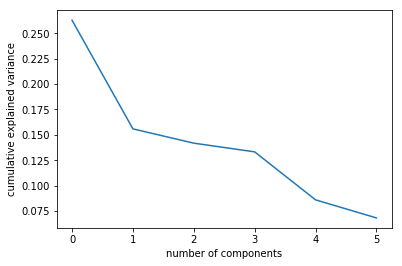

In [16]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()